Shape of Data:  (150, 4)
Shape of transformed Data:  (150, 2)


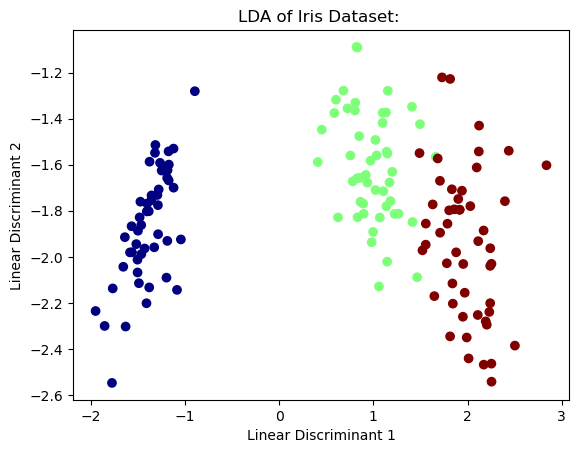

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

class LDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)

        mean_overall = np.mean(X, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))

        for c in class_labels:
            X_c = X[y==c]
            mean_c = np.mean(X_c, axis=0)
            SW += (X_c - mean_c).T.dot((X_c - mean_c))
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)

        A = np.linalg.inv(SW).dot(SB)
        eigenvalues, eigenvectors = np.linalg.eig(A)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        self.linear_discriminants = eigenvectors[:self.n_components]

    def transform(self, X):
        return np.dot(X, self.linear_discriminants.T)

X = load_iris().data
y = load_iris().target

lda = LDA(n_components=2)
lda.fit(X, y)
X_projected = lda.transform(X)

print("Shape of Data: ", X.shape)
print("Shape of transformed Data: ", X_projected.shape)

ld1 = X_projected[:, 0]
ld2 = X_projected[:, 1]

plt.scatter(ld1, ld2, c=y, cmap="jet")
plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.title("LDA of Iris Dataset: ")
plt.show()
        